# LeNet5 A-Z mnist

##### Preprocess

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv(r'C:\Users\User\Desktop\DL_A-Zmnist\Dataset\handwritten_data_785.csv')
data = data.to_numpy()


Random 10% of data

In [3]:
cut = np.random.permutation(np.arange(len(data)))
split0 = data.shape[0] * 7//10
idx = cut[:split0]
data_suff = data[idx]
del data
print(len(data_suff))

260425


In [4]:
import string
X = data_suff[:,1:]
Y = data_suff[:,0]
nr_to_letter = {k:v.upper() for k,v in enumerate(list(string.ascii_lowercase))}
X=X.reshape(len(X),28,28)
X = X[:,:,:,None]
print(X.shape)
print(Y)
print(nr_to_letter)

(260425, 28, 28, 1)
[ 0  4 19 ... 13 22  9]
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


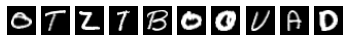

In [5]:
n = 10
for j,i in enumerate(np.random.choice(len(X),n)):
    plt.subplot(1,n,j+1)
    plt.imshow(X[i],cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
X = tf.image.resize(X,[32,32])

Split to 80% train and 20% test.

In [ ]:
idx = np.random.permutation(np.arange(len(X)))
split = X.shape[0] * 8//10 # แบ่ง train 80 %
train_idx = idx[:split]
test_idx = idx[split:]
Xtrain,Ytrain,Xtest,Ytest = [],[],[],[]
for idx in train_idx:
    Xtrain.append(X[idx]/255.)
    Ytrain.append(Y[idx].astype(np.int))
Xtrain = np.array(Xtrain)    
for idx in test_idx:
    Xtest.append(X[idx]/255.)
    Ytest.append(Y[idx].astype(np.int))  
Xtrain,Ytrain,Xtest,Ytest = np.array(Xtrain) ,np.array(Ytrain) ,np.array(Xtest) ,np.array(Ytest)      
# Xtrain,Ytrain = X[train_idx]/255.,Y[train_idx].astype(np.int)
# Xtest,Ytest = X[test_idx]/255.,Y[test_idx].astype(np.int)
print(Xtrain.shape)
print(Xtest.shape)

In [ ]:
n = 10
for j,i in enumerate(np.random.choice(len(Xtrain),n)):
    plt.subplot(1,n,j+1)
    plt.imshow(Xtrain[i],cmap='gray')
    plt.axis('off')
plt.show()

##### Training

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6,(5,5),input_shape=(32,32,1),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
# MLP
model.add(tf.keras.layers.Dense(120,activation='relu'))
model.add(tf.keras.layers.Dense(84,activation='relu'))
model.add(tf.keras.layers.Dense(26,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd')

In [ ]:
# model.summary()
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.fit(Xtrain,Ytrain,epochs=100)

Save model as .pd file

In [ ]:
model.save(r"C:\Users\User\Desktop\Super_AI\DL_NN\DL_A-Zmnist\Model")

loaded_model = tf.keras.models.load_model(r"C:\Users\User\Desktop\Super_AI\DL_NN\DL_A-Zmnist\Model")

##### Predict

In [ ]:
Z = loaded_model.predict(Xtest)
print('Performance ',np.sum(Z.argmax(axis=1)==Ytest)/len(Z))
# history = model
# plt.plot(history.history['loss'])
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.show()

In [ ]:
n = 10
print('Predict : ',Z[n])
print('Max : ',np.amax(Z[n]))
print('Predict index :',np.where(Z[n] == np.amax(Z[n]))[0],
        '| Predict Answer :',nr_to_letter.get(np.where(Z[n] == np.amax(Z[n]))[0][0]),
        '| Xtest :',Ytest[n])
plt.imshow(Xtest[n],cmap='gray')